<a href="https://colab.research.google.com/github/IvanLudvig/ComputationalMaths/blob/master/utils/boundary_value_findiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import *

In [2]:
ddy, dy, y, x = symbols('y\'\' y\' y x')
y_n, y_nprev, y_nnext, h = symbols('y_n y_{n+1} y_{n-1} h')

In [3]:
fd = (y_nnext-y_nprev)/(2*h)
fdd = (y_nnext-2*y_n + y_nprev)/h**2

fd1 = (y_nnext-y_n)/(h)
dy0 = 0

In [4]:
expr = ddy + 2*dy + (1+x**2)*y-2*(1-3*x**2)
Eq(expr, 0)

Eq(6*x**2 + y*(x**2 + 1) + 2*y' + y'' - 2, 0)

Аппроксимация граничного условия

In [5]:
expansion = y + h*dy + (h**2/2)*ddy
r = simplify(fd1.subs(y_nnext, expansion).subs(y, y_n))
r

h*y''/2 + y'

In [6]:
expr0 = expr.subs(dy, dy0).subs(x, 0)
expr0

y + y'' - 2

In [7]:
collected_expr0 = collect((fd1 - r).subs(dy, dy0).subs(ddy, solve(expr0, ddy)[0].subs(y, y_n)).expand(), [y_n, y_nnext])
collected_expr0

-h + y_n*(h/2 - 1/h) + y_{n-1}/h

In [8]:
b_0, c_0, d_0 = symbols('b_0 c_0 d_0')
Eq(b_0, collected_expr0.coeff(y_n))

Eq(b_0, h/2 - 1/h)

In [9]:
Eq(c_0, collected_expr0.coeff(y_nnext))

Eq(c_0, 1/h)

In [10]:
Eq(d_0, -collected_expr0.subs(y_n, 0).subs(y_nnext, 0))

Eq(d_0, h)

Аппроксимация с точностью O(h^2)

In [11]:
expr_diff = expr.subs(ddy, fdd).subs(dy, fd).subs(y, y_n)
Eq(expr_diff, 0)

Eq(6*x**2 + y_n*(x**2 + 1) - 2 + (-y_{n+1} + y_{n-1})/h + (-2*y_n + y_{n+1} + y_{n-1})/h**2, 0)

In [12]:
collected = collect(expr_diff.expand(), [y_n, y_nprev, y_nnext])

In [13]:
a_n, b_n, c_n, d_n = symbols('a_n b_n c_n d_n')

Коэффициенты матрицы

In [14]:
Eq(a_n, collected.coeff(y_nprev))

Eq(a_n, -1/h + h**(-2))

In [15]:
Eq(b_n, collected.coeff(y_n))

Eq(b_n, x**2 + 1 - 2/h**2)

In [16]:
Eq(c_n, collected.coeff(y_nnext))

Eq(c_n, 1/h + h**(-2))

In [17]:
Eq(d_n, -collected.subs(y_n, 0).subs(y_nprev, 0).subs(y_nnext, 0))

Eq(d_n, 2 - 6*x**2)

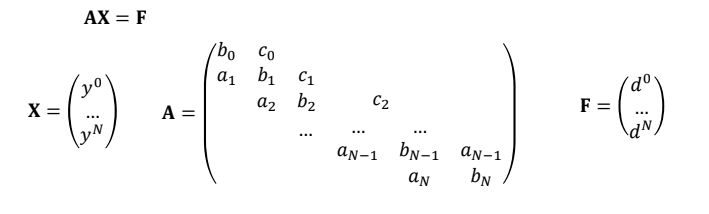